# Logistic Regression on FIFA 2018

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
    - 2.1 [Importing package](#section201)<br>
    - 2.2 [Importing dataset](#section202)<br>
3. [Preprocessing](#section3)
    - 3.1 [Number of rows and columns of dataset](#section301)<br>
    - 3.2 [Details of dataset](#section302)<br>
    - 3.3 [Find null values in dataset](#section303)<br>
    - 3.4 [Quantify qualitative data of Team and Opponent](#section304)<br>
    - 3.5 [Quantify qualitative data of Man of the Match](#section305)<br>
    - 3.6 [Drop columns](#section306)<br>
    - 3.7 [Statistics of data](#section307)<br>
4. [Visualization](#section4)<br>
    - 4.1 [Pair plot](#section401)<br>
    - 4.2 [Correlation](#section402)<br>
5. [Logistic Regression](#section5)<br>
    - 5.1 [Preparing X and y using pandas](#section501)<br>
    - 5.2 [Splitting X and y into training and test datasets.](#section502)<br>
    - 5.3 [Logistic regression in scikit-learn](#section503)<br>
    - 5.4 [Using the Model for Prediction](#section504)<br>
6. [Model evaluation](#section6)<br>
    - 6.1 [Model Evaluation using accuracy classification score](#section601)<br>
    - 6.2 [Model Evaluation using confusion matrix](#section602)<br> 

<a id='section1'></a>
## 1. Problem Statement

The goal is to predict winning team by man of the match awarded in FIFA 2018 using Logistic regression.

<a id='section2'></a>
## 2. Data Loading and Description

- The dataset consists of the information about team played in FIFA 2018. Various variables present in the dataset includes data of team, opponent, goal scored, man of the match etc. 
- The dataset comprises of __128 observations of 27 columns__. Below is a table showing names of all the columns and their description.

| Column Name             | Description                                                       |
| -------------           |:-------------                                                    :| 
| Date                    | Match Date                                                        | 
| Team                    | Playing Team                                                      |  
| opponent                | Opponent Team                                                     | 
| Goal Scored             | Number of goals scored by this team                               |   
| Ball Possession         | %Amount of time ball was in control by the team                   |
| Attempts                | Number of attempts to score goal                                  |
| On-Target               | Number of shots on-target                                         |
| Off-Target              | Number of shots that went off-target                              |
| Blocked                 | Number of opponent team's attempts blocked by the team            |
| Corners                 | Number of corner shots used                                       |
| Offsides                | Number of off-side events                                         |
| Free Kicks              | Number of free-kicks used                                         |
| Saves                   | saves by the goal keeper                                          |
| Pass Accuracy           | %Percentage of passes that reached the same team player as aimed  |
| Passes                  | Total number of passes by the team                                |
| Distance Covered (Kms)  | Total distance covered by the team members in this game           |
| Fouls Committed         | Number of fouls committed by the team members                     |
| Yellow Card             | Number of Yellow warning received                                 |
| Yellow & Red            | Number of Yellow & Red warning received                           |
| Red                     | Number of Red cards received                                      |
| Man of the Match        | Did this team member win Man of the Match?                        |
| 1st Goal                | When did the team score the 1st goal?                             |
| Round                   | Stage of the match                                                |
| PSO                     | Was there a penalty shootout (PSO) in this match?                 |
| Goals in PSO            | Number of goals scored in the Penalty shootout                    |
| Own goals               | Number of own goals                                               |
| Own goal Time           | When did the team score own goal?                                 |

<a id='section201'></a>
### 2.1 Importing package

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

<a id='section202'></a>
### 2.2 Importing dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv")

<a id='section3'></a>
## 3. Preprocessing

<a id='section301'></a>
### 3.1 Number of rows and columns of dataset

In [3]:
df.shape

(128, 27)

<a id='section302'></a>
### 3.2 Details of dataset

In [4]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


<a id='section303'></a>
### 3.3 Find null values in dataset

In [5]:
df.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

<a id='section304'></a>
### 3.4 Quantify qualitative data of Team and Opponent

- Columns __TeamId__ and __OpponentId__ are added for calculation purpose

In [6]:
TeamId = {'Argentina':1001, 'Australia':1002, 'Belgium':1003, 'Brazil':1004, 'Colombia':1005,
          'Costa Rica':1006, 'Croatia':1007, 'Denmark':1008, 'Egypt':1009, 'England':1010,
          'France':1011, 'Germany':1012, 'Iceland':1013, 'Iran':1014, 'Japan':1015, 'Korea Republic':1016,
          'Mexico':1017, 'Morocco':1018, 'Nigeria':1019, 'Panama':1020, 'Peru':1021, 'Poland':1022,
          'Portugal':1023, 'Russia':1024, 'Saudi Arabia':1025, 'Senegal':1026, 'Serbia':1027,
          'Spain':1028, 'Sweden':1029, 'Switzerland':1030, 'Tunisia':1031, 'Uruguay':1032}
df.loc[:,'TeamId']=df['Team'].map(TeamId)
df.loc[:,'OpponentId']=df['Opponent'].map(TeamId)

<a id='section305'></a>
### 3.5 Quantify qualitative data of Man of the Match

- Column __Result__ is added for calculation purpose

In [7]:
MoM = {'Yes':1, 'No':0}
df.loc[:,'Result']=df['Man of the Match'].map(MoM)

<a id='section306'></a>
### 3.6 Drop columns

- Dealing with missing values<br/>
    - Dropping the column __Own goals__ and __Own goal Time__as it has too many _null_ values.
    - Dropping the column __1st Goal__ as it has some _null_ values will not affect in finding winning team.
    - Dropping __Team__, __Opponent__ and __Man of the Match__ as it has string values and not helpful for calculation.
    - Similarly dropping some other columns also as they are not useful to find the winning team.

In [8]:
df_upd=df.drop(['Team','Opponent','Man of the Match','Date','1st Goal','Own goals','Own goal Time','Distance Covered (Kms)','Fouls Committed','Yellow Card','Yellow & Red','Red','Round','PSO'], axis = 1)
df_upd.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Goals in PSO,TeamId,OpponentId,Result
0,5,40,13,7,3,3,6,3,11,0,78,306,0,1024,1025,1
1,0,60,6,0,3,3,2,1,25,2,86,511,0,1025,1024,0
2,0,43,8,3,3,2,0,1,7,3,78,395,0,1009,1032,0
3,1,57,14,4,6,4,5,1,13,3,86,589,0,1032,1009,1
4,0,64,13,3,6,4,5,0,14,2,86,433,0,1018,1014,0


<a id='section307'></a>
### 3.7 Statistics of data

- Find the __mean__ and __std__ values
- Find any outliers there or not

In [9]:
df_upd.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Goals in PSO,TeamId,OpponentId,Result
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,0.203125,1015.726562,1015.726562,0.500000
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,0.807049,9.519739,9.519739,0.501965
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,0.000000,1001.000000,1001.000000,0.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,0.000000,1007.000000,1007.000000,0.000000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,0.000000,1015.000000,1015.000000,0.500000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,0.000000,1024.000000,1024.000000,1.000000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,4.000000,1032.000000,1032.000000,1.000000


<a id='section4'></a>
## 4. Visualization

<a id='section401'></a>
### 4.1 Pair plot

- Pair plot shows the joint relationship between __features__

Text(0.5, 1, 'Pair plot 1')

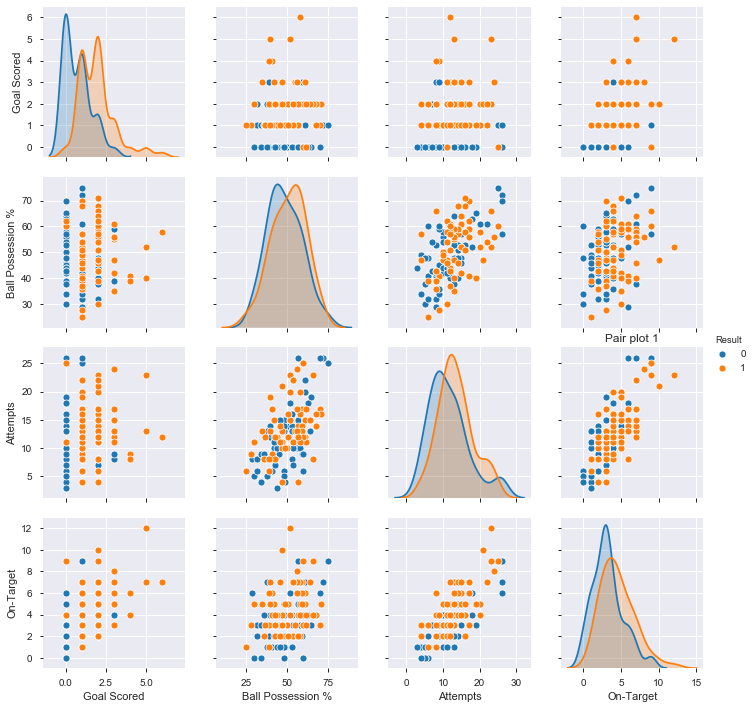

In [10]:
sns.pairplot(df_upd[['Goal Scored','Ball Possession %','Attempts','On-Target','Result']],vars=['Goal Scored','Ball Possession %','Attempts','On-Target'],hue='Result')
plt.title('Pair plot 1')

- The above plot shows relationship between __Goal Scored__,__Ball Possession %__,__Attempts__,__On-Target__ and __Result__
- __Orange__ shows __winning team__
- __Goal Scored__ by __winning team__ is __high__
- Both the teams possesed the ball in equal amount of time
- Number of attempts to shot goal by __winning team__ is __high__
- Number of shots on-target by __winning team__ in __high__

Text(0.5, 1, 'Pair plot 2')

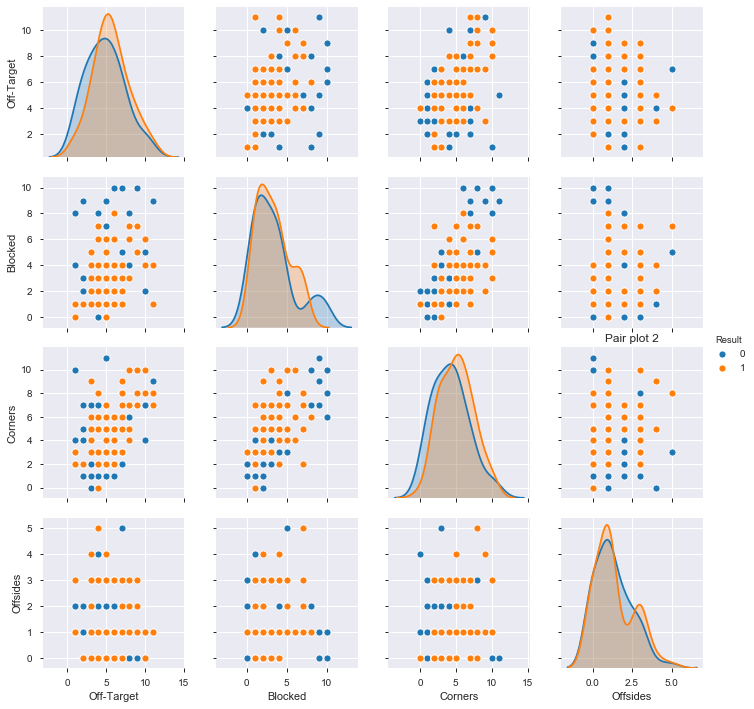

In [11]:
sns.pairplot(df_upd[['Off-Target','Blocked','Corners','Offsides','Result']],vars=['Off-Target','Blocked','Corners','Offsides'],hue='Result')
plt.title('Pair plot 2')

- The above plot shows relationship between __Off-Target__,__Blocked__,__Corners__,__Offsides__ and __Result__
- Numbe of shots went off the target quite __high__ by winning team
- Both teams good in __blocking__ the opponent goals
- Number of corner shots got by winning team is quite __high__

Text(0.5, 1, 'Pair plot 3')

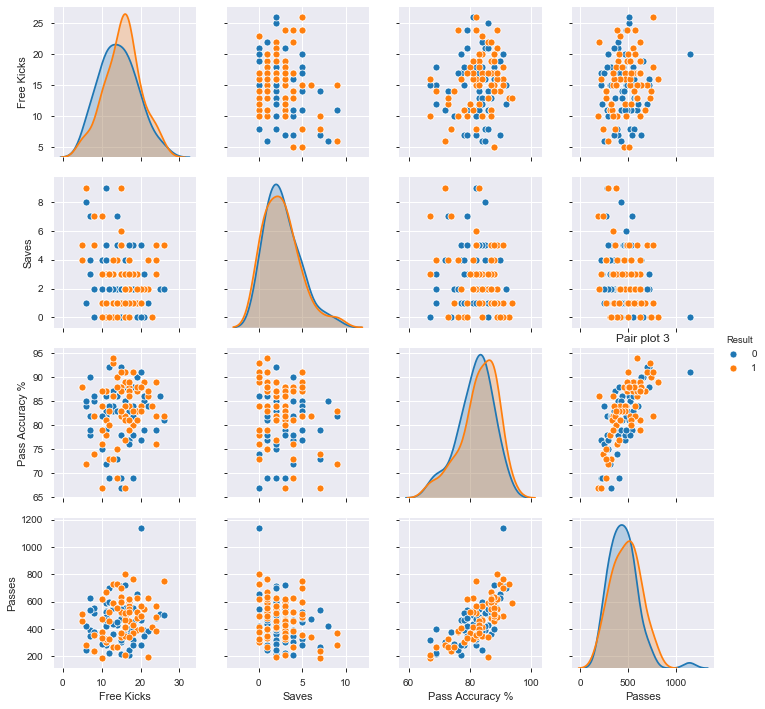

In [12]:
sns.pairplot(df_upd[['Free Kicks','Saves','Pass Accuracy %','Passes','Result']],vars=['Free Kicks','Saves','Pass Accuracy %','Passes'],hue='Result')
plt.title('Pair plot 3')

- The above plot shows relationship between __Free Kicks__,__Saves__,__Pass Accuracy %__,__Passes__ and __Result__
- Number of __Free Kicks__ by winning team is quite __high__
- Both teams goal keeper saved the ball from goal equally
- Both teams passed the ball correctly
- Number of passes by __lost team__ is quite __high__

<a id='section402'></a>
### 4.2 Correlation

- Correlation between all the __features__ using __heatmap__

Text(0.5, 1, 'Correlation between features')

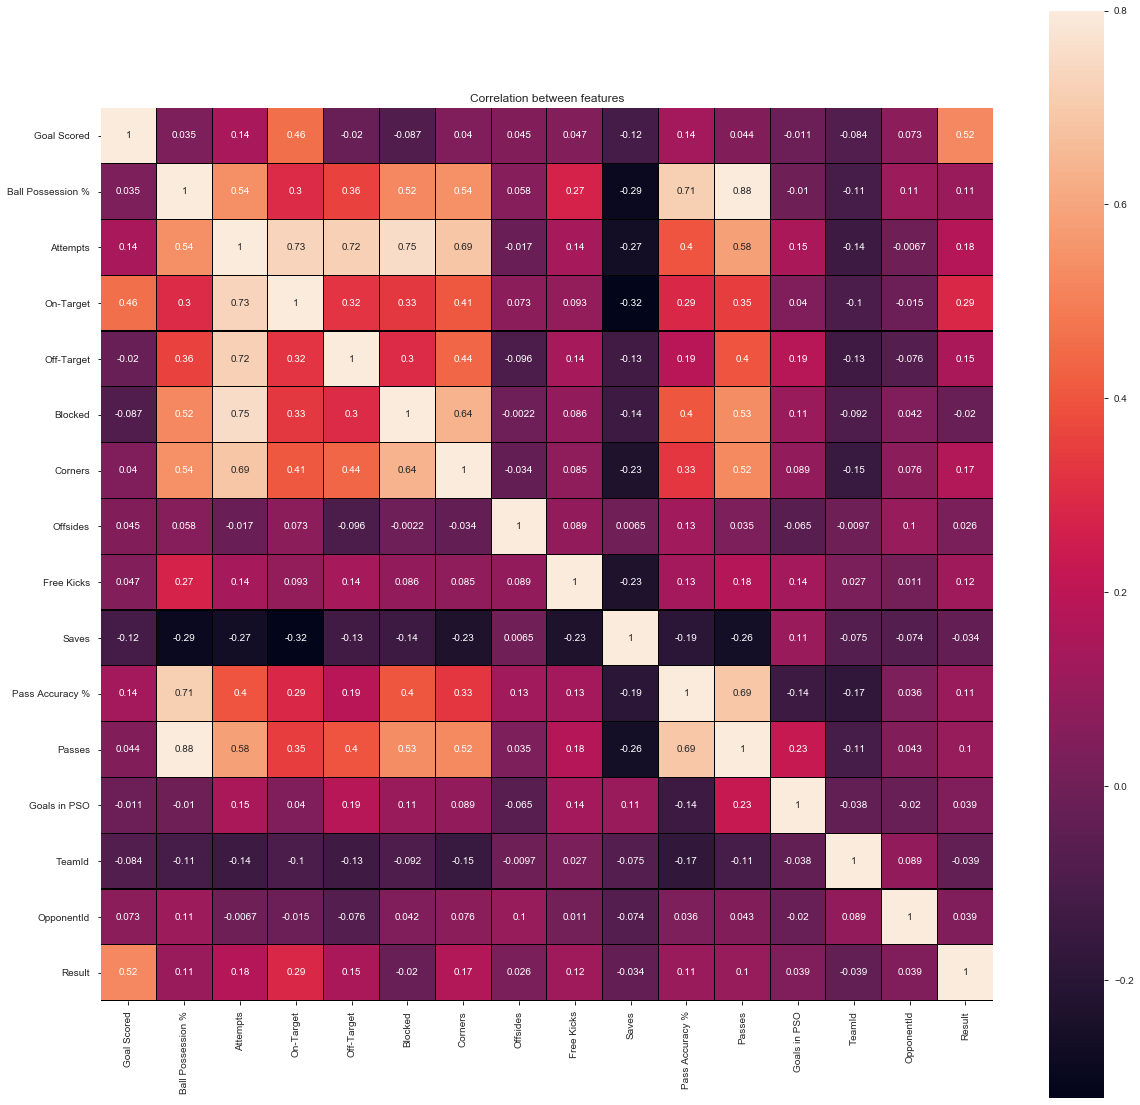

In [13]:
corr = df_upd.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01,square=True,annot=True,linecolor='black')
plt.title('Correlation between features')

- __Goal Scored__ and __On-Target__ are positively correlated
- __Ball Possession %__ is highly correlated with __Passes__ and __Pass Accuracy %__
- __Goal Scored__ is negatively correlated with __Saves__, __Blocked__ and __Off-Target__

<a id='section5'></a>
## 5. Logistic Regression

<a id='section501'></a>
### 5.1 Preparing X and y using pandas

In [14]:
X = df_upd.loc[:,df_upd.columns != 'Result']
X.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Goals in PSO,TeamId,OpponentId
0,5,40,13,7,3,3,6,3,11,0,78,306,0,1024,1025
1,0,60,6,0,3,3,2,1,25,2,86,511,0,1025,1024
2,0,43,8,3,3,2,0,1,7,3,78,395,0,1009,1032
3,1,57,14,4,6,4,5,1,13,3,86,589,0,1032,1009
4,0,64,13,3,6,4,5,0,14,2,86,433,0,1018,1014


In [15]:
y = df_upd['Result']

<a id='section502'></a>
### 5.2 Splitting X and y into training and test datasets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [17]:
print(X_train.shape)
print(y_train.shape)

(102, 15)
(102,)


<a id='section503'></a>
### 5.3 Logistic regression in scikit-learn

- Rules
    - Load the algorithm
    - Instantiate and Fit the model to the training dataset
    - Prediction on the test set
    - Calculating the accuracy of the model

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<a id='section504'></a>
### 5.4 Using the Model for Prediction

In [19]:
y_pred_train = logreg.predict(X_train)

- Make __predictions__ on the __testing__

In [20]:
y_pred_test = logreg.predict(X_test)

<a id='section6'></a>
## 6. Model Evaluation

- We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id='section601'></a>
### 6.1 Model Evaluation using accuracy classification score

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7307692307692307


<a id='section602'></a>
### 6.2 Model Evaluation using confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

   0   1
0  8   5
1  2  11


In [23]:
confusion_matrix.index = ['Actual Lost','Actual Win']
confusion_matrix.columns = ['Predicted Lost','Predicted Win']
print(confusion_matrix)

             Predicted Lost  Predicted Win
Actual Lost               8              5
Actual Win                2             11


This means 8 + 11 = __19 correct predictions__ & 2 + 5 = __7 false predictions__.

__Adjusting Threshold__ for predicting Lost or Won.

- In the section [5.4](#section5.4) we have used, __.predict__ method for classification. This method takes 0.5 as the default threshhod for prediction.<br/>
- Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model. <br/>
- For this we are going to use __.predict_proba__ method instead of using .predict method.

- Setting the threshold to __0.75__

In [24]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.6153846153846154


The accuracy have been __reduced__ significantly changing from __0.73 to 0.62__. Hence, 0.75 is __not a good threshold__ for our model. 

- Setting the threshold to __0.25__

In [25]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.6153846153846154


The accuracy have been __reduced__ significantly changing from __0.73 to 0.62__. Hence, 0.25 is __not a good threshold__ for our model. 